In [1]:
import os 
import pandas as pd     
import numpy as np  
import cv2
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import tqdm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

2024-04-16 22:00:15.815167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 22:00:15.815298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 22:00:16.085359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("/kaggle/input/the-oxfordiiit-pet-dataset")

In [4]:
images = np.load('/kaggle/input/dataset-oxford-preprocessing/images_oxford.npy')
labels = np.load('/kaggle/input/dataset-oxford-preprocessing/labels_oxford.npy',allow_pickle = True)

In [5]:
set(labels)

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier'}

In [6]:
len(labels)

14779

In [7]:
breeds = Counter(labels)
breeds

Counter({'american_pit_bull_terrier': 400,
         'leonberger': 400,
         'english_cocker_spaniel': 400,
         'Siamese': 400,
         'saint_bernard': 400,
         'american_bulldog': 400,
         'Sphynx': 400,
         'Egyptian_Mau': 400,
         'Birman': 400,
         'english_setter': 400,
         'newfoundland': 400,
         'pug': 400,
         'yorkshire_terrier': 400,
         'Abyssinian': 400,
         'havanese': 400,
         'miniature_pinscher': 400,
         'chihuahua': 400,
         'basset_hound': 400,
         'Bombay': 400,
         'British_Shorthair': 400,
         'Maine_Coon': 400,
         'Bengal': 400,
         'japanese_chin': 400,
         'shiba_inu': 400,
         'wheaten_terrier': 400,
         'beagle': 400,
         'Persian': 400,
         'great_pyrenees': 400,
         'pomeranian': 400,
         'samoyed': 400,
         'german_shorthaired': 400,
         'Ragdoll': 400,
         'keeshond': 400,
         'Russian_Blue': 400,
   

In [8]:
num_classes = len(breeds)
num_classes

37

In [9]:
images.shape, labels.shape

((14779, 224, 224, 3), (14779,))

In [10]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

labels_encoded = to_categorical(labels_encoded)

In [11]:
# images = images / 255.0

In [12]:
images.shape, labels_encoded.shape

((14779, 224, 224, 3), (14779, 37))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.30,stratify=labels_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50,stratify=y_test, random_state=42)

In [14]:
image_height = images.shape[1]
image_width = images.shape[2]
num_channels = images.shape[3]

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 37)             │         9,509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,254,181 (84.89 MB)

 Trainable params: 22,254,181 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/kaggle/working/best_model.keras', monitor='val_accuracy', save_best_only=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training with callbacks and validation set
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1,
                    validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 50:29 19s/step - accuracy: 0.0000e+00 - loss: 46.3226

I0000 00:00:1713304885.444527      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713304885.463501      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.0235 - loss: 31.6297

W0000 00:00:1713304910.793107      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/162 ━━━━━━━━━━━━━━━━━━━━ 47s 172ms/step - accuracy: 0.0235 - loss: 31.5211 - val_accuracy: 0.0383 - val_loss: 7.2346
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.0401 - loss: 6.7231 - val_accuracy: 0.0609 - val_loss: 5.6700
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.0831 - loss: 5.4390 - val_accuracy: 0.1398 - val_loss: 4.8644
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.1880 - loss: 4.6205 - val_accuracy: 0.2422 - val_loss: 4.3936
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.2967 - loss: 4.0802 - val_accuracy: 0.3054 - val_loss: 4.2094
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.3923 - loss: 3.7587 - val_accuracy: 0.3978 - val_loss: 3.9772
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.4769 - loss: 3.4809 - val_accuracy: 0.4641 - val_loss: 3.9603
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.5503 - loss: 3.3079 - val_accur

In [17]:
model.evaluate(X_test, y_test, verbose=1)

70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6766 - loss: 4.0216


[3.8591182231903076, 0.6991429924964905]

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

classification_rep = classification_report(y_test_labels, y_pred_labels)

print(classification_rep)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        60
           1       0.64      0.78      0.70        60
           2       0.63      0.73      0.68        60
           3       0.88      0.75      0.81        60
           4       0.71      0.82      0.76        60
           5       0.76      0.62      0.68        60
           6       0.74      0.72      0.73        60
           7       0.79      0.68      0.73        60
           8       0.80      0.60      0.69        60
           9       0.81      0.73      0.77        60
          10       0.70      0.83      0.76        60
          11       0.79      0.70      0.74        60
          12       0.76      0.73      0.75        60
          13       0.62      0.78      0.69        60
          14       0.78      0.65      0.71        60
          15       0.75      0.77      0.76        60
          16       0.68      0.67      0.

In [19]:
# Find the class that was predicted wrong the most
wrong_predictions = np.where(y_pred_labels != y_test_labels)[0]
wrong_classes = y_test_labels[wrong_predictions]
most_wrong_class = Counter(wrong_classes).most_common(1)[0][0]

print(f"The class predicted wrong the most is: {most_wrong_class}")

The class predicted wrong the most is: 26


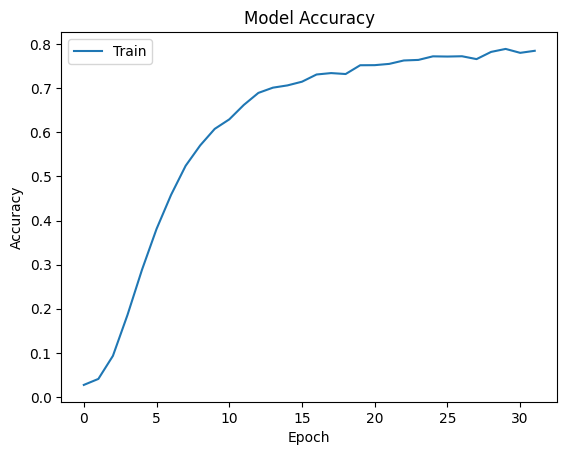

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

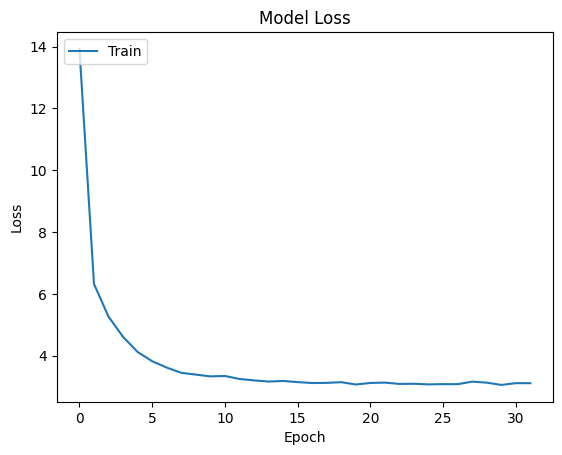

In [21]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


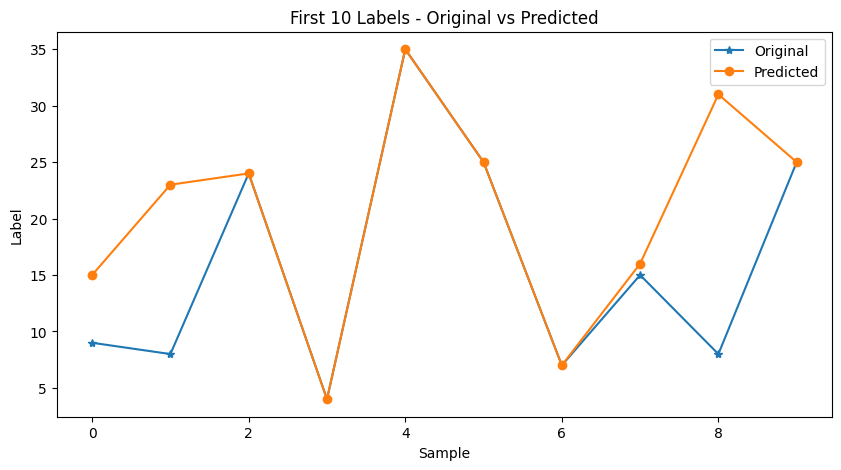

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_labels[:10], '*-', label='Original')
plt.plot(y_pred_labels[:10], 'o-', label='Predicted')
plt.title('First 10 Labels - Original vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Label')
plt.legend()
plt.show()

In [24]:
sample_labels_true = label_encoder.inverse_transform(y_test_labels)
sample_labels_pred = label_encoder.inverse_transform(y_pred_labels)

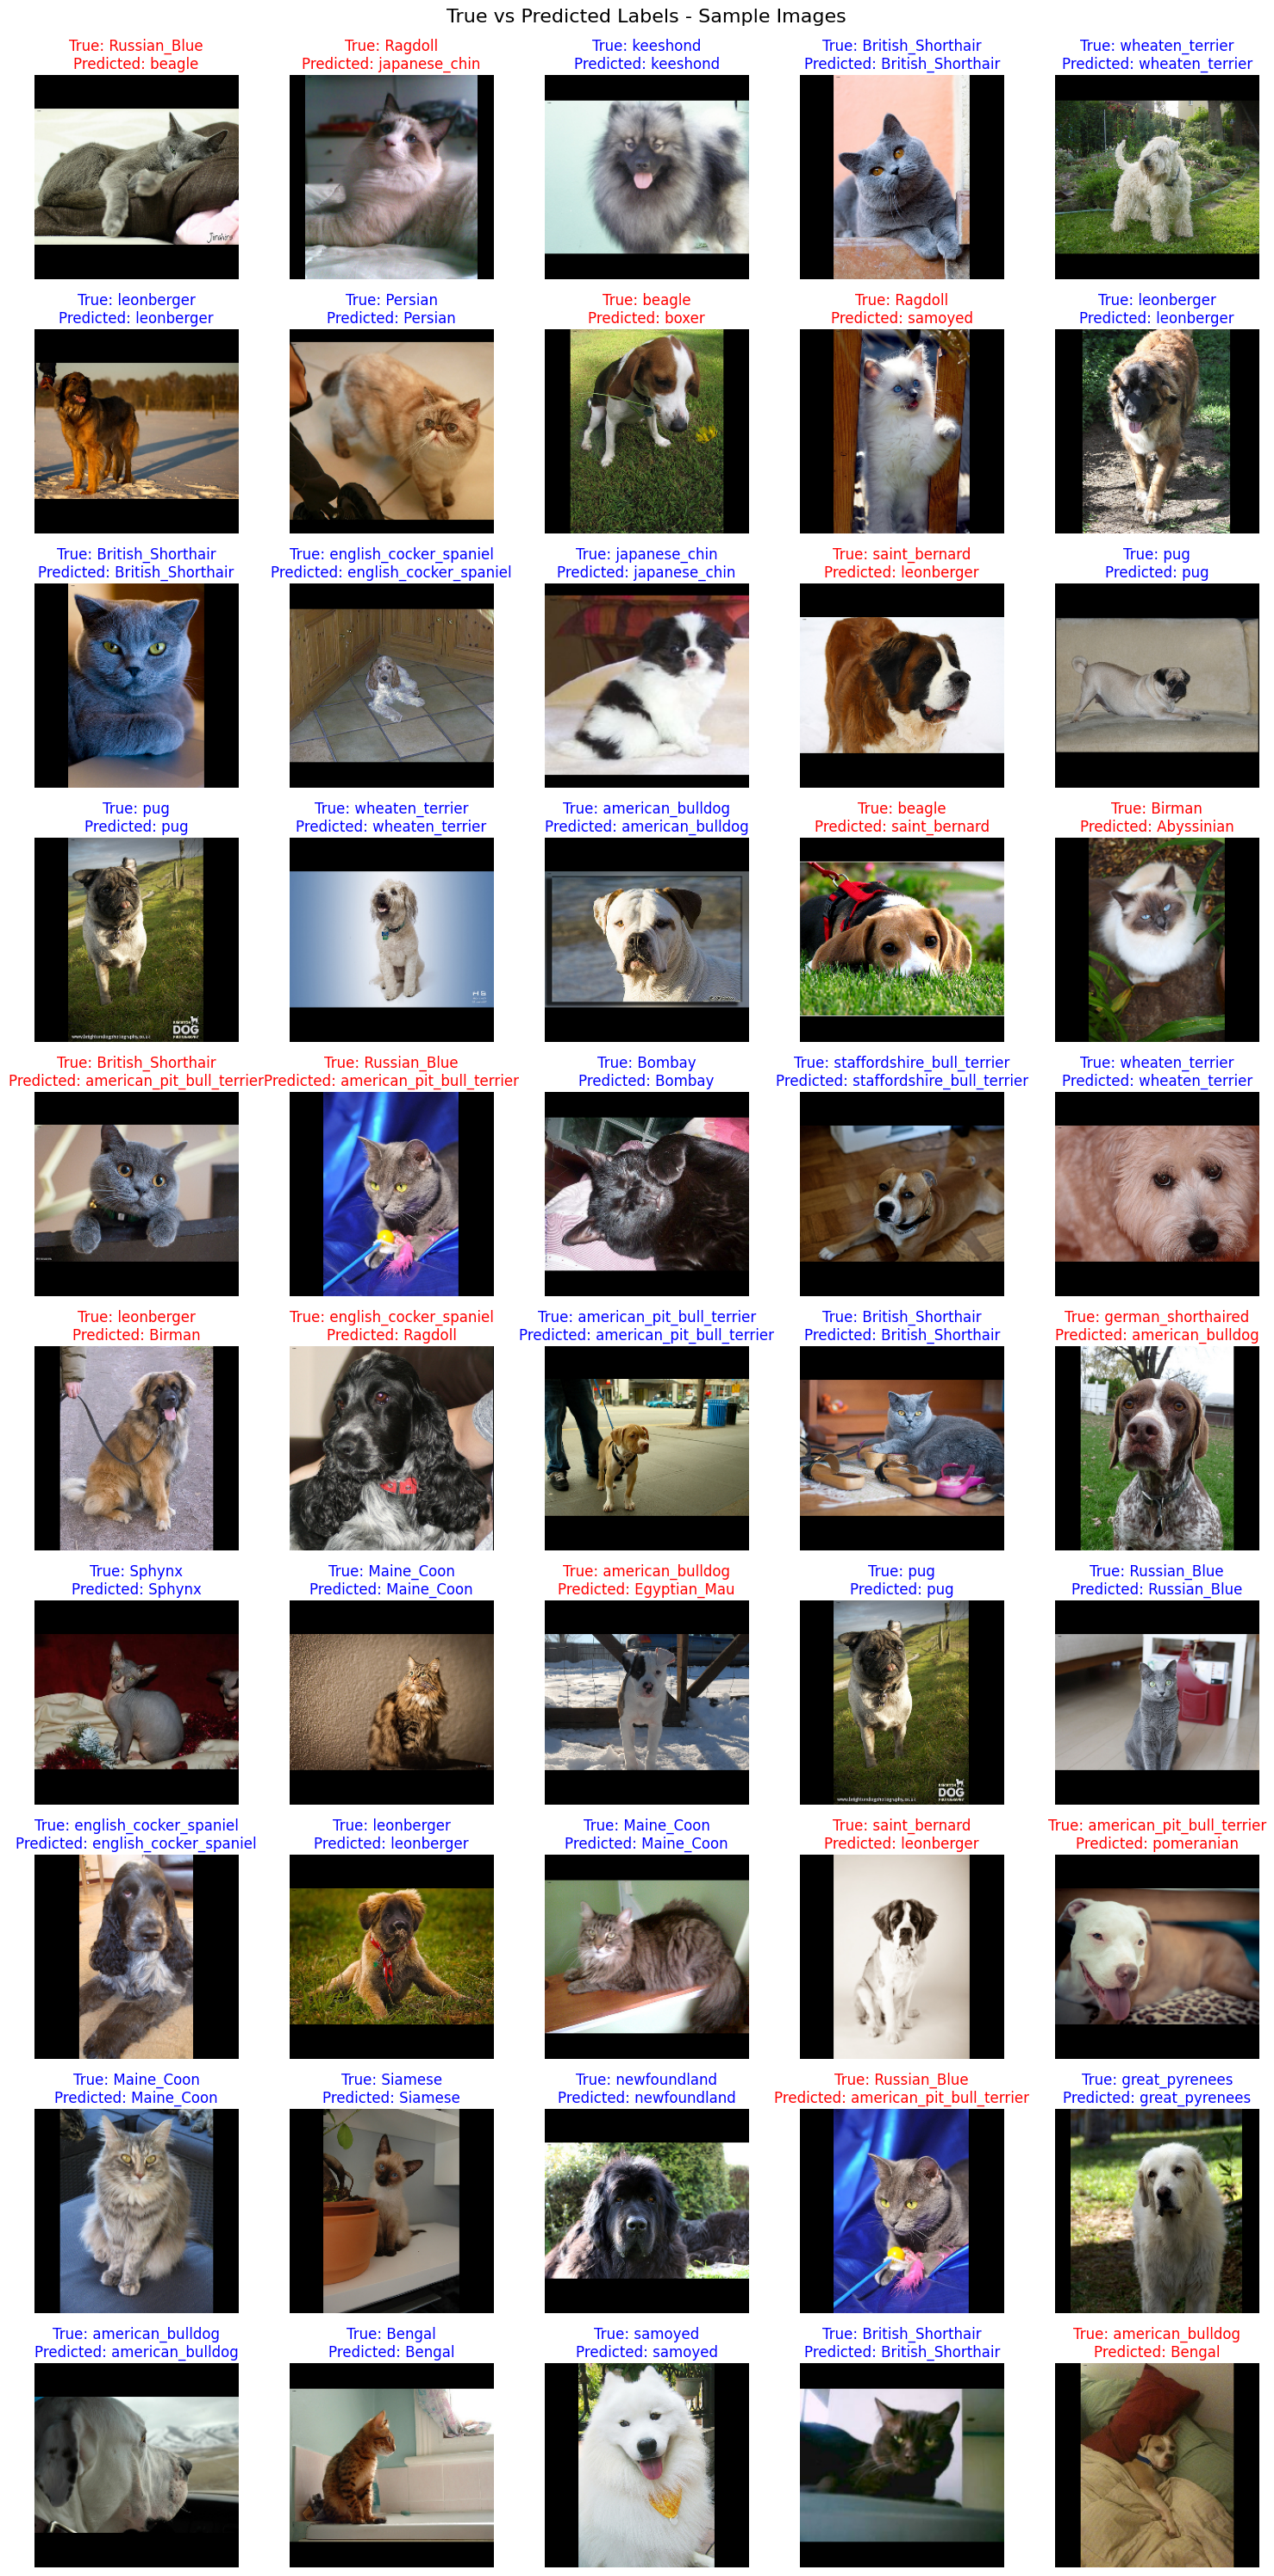

In [25]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 30))
fig.suptitle('True vs Predicted Labels - Sample Images', fontsize=16,y=0.995) 

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    title = ax.set_title(f'True: {sample_labels_true[i]}\nPredicted: {sample_labels_pred[i]}')
    if sample_labels_true[i] != sample_labels_pred[i]:
        title.set_color('red')
    else:
        title.set_color('blue')
    ax.axis('off')

plt.tight_layout()
plt.show()